# Aula 15 – Segmentação: Watershed

## 1. Introdução

Até agora tratamos da segmentação de elementos da imagem, como bordas, curvas e pontos, mas podemos também precisar segmentar regiões. Um algoritmo clássico para tal tarefa é o Watershed (“bacia hidrográfica” ou “divisor de águas”). A ideia é considerar a imagem como um terreno no qual os valores de intensidade dos pixels indicam as “profundidades” ou “elevações”. O algoritmo, então, “inunda” esse terreno, demarcando “com água” cada “bacia”. Sempre que as “águas” de duas bacias se encontram, é criada uma linha de contenção. Ao terminar a inundação, essas linhas demarcarão os contornos dos objetos.

## 2. Leitura Complementar

Livro E – Seção 5.3.4

Livro 1 – Seção 7.4

Livro 3 – Seção 10.5

## 3. Exercícios

- Realize o tutorial de Watershed do OpenCV:
https://docs.opencv.org/master/d3/db4/tutorial_py_watershed.html

Caso esteja trabalhando com Octave, tente reproduzir o tutorial. O pacote “image” possui a função “watershed” implementada.


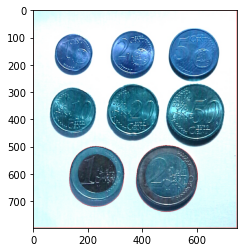

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('moedasw.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)


sure_bg = cv2.dilate(opening,kernel,iterations=3)


dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)


sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)


ret, markers = cv2.connectedComponents(sure_fg)


markers = markers+1


markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(img)
plt.show()
